In [77]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [78]:
transactions = pd.read_csv('creditcard.csv')

In [79]:
transactions.shape

(284807, 31)

In [80]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [81]:
transactions.isnull().any().any()

False

In [82]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173438,121482.0,0.243283,1.135203,-2.331887,-0.652055,1.533160,-0.499443,1.154317,0.154697,-0.894073,-0.950879,0.206441,0.798093,0.845151,-0.480278,-1.487661,0.361336,0.170312,0.606358,0.238467,-0.120756,0.204054,0.538671,-0.089063,-0.157341,-0.160672,0.544186,-0.164264,-0.059531,42.81,0
158953,112017.0,-1.279762,0.489341,1.191725,-2.492003,-0.245443,-0.270046,-0.163012,0.480909,-1.408978,-0.187827,0.313922,0.295039,1.024890,-0.322894,-1.304094,1.623305,-0.347883,-0.691074,0.440871,0.108248,0.242232,0.616035,-0.379450,-0.451476,0.872741,-0.118898,0.014242,0.014217,3.90,0
247832,153705.0,-0.459015,-0.207853,2.189452,-2.001899,-0.922265,0.218596,-0.624701,0.353164,0.207161,-0.315515,-1.196272,-0.314411,0.094696,-1.403423,-1.731459,0.915786,0.368293,-1.413631,-0.064663,0.114322,0.189288,0.846375,-0.106292,1.118757,-0.308195,-0.342372,0.429987,0.229823,1.00,0
39549,39880.0,1.035117,0.999347,-1.600972,1.522032,1.364316,-0.014340,0.355807,0.269243,-0.279794,-1.702323,1.838606,-0.726576,-1.638358,-2.965882,2.286755,-0.261424,4.108374,-0.549548,-2.502939,-0.269538,-0.084477,-0.061830,-0.025012,-0.998561,0.452603,-0.181386,0.102682,0.082753,1.99,0
151375,95462.0,-1.504848,0.338793,1.072892,-0.183773,1.221131,0.105930,0.596836,-0.061391,1.960715,-0.103012,1.370989,-1.347672,1.633386,0.735098,-3.314060,-0.829446,0.583925,-0.360004,0.574669,0.045812,-0.664692,-0.609464,0.353599,0.667511,0.117457,0.034938,0.513421,0.013636,0.01,0


In [83]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [84]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [85]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']               # Response
del transactions 

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [88]:
X_train.shape

(227845, 30)

In [89]:
X_test.shape

(56962, 30)

In [90]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [91]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600


In [92]:
X_train['Time'].max() / 24

1.9999074074074075

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Transaction Times')

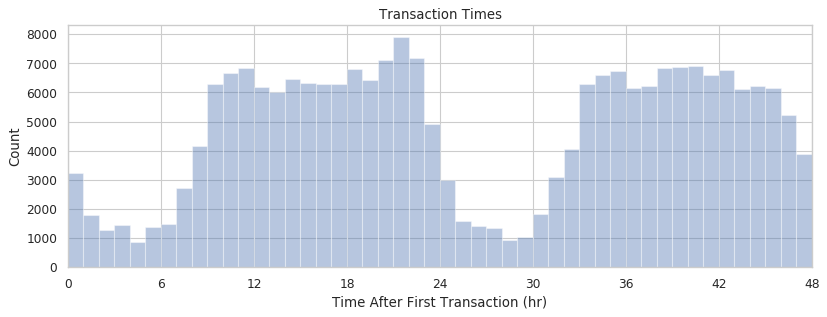

In [93]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [94]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Transaction Amounts')

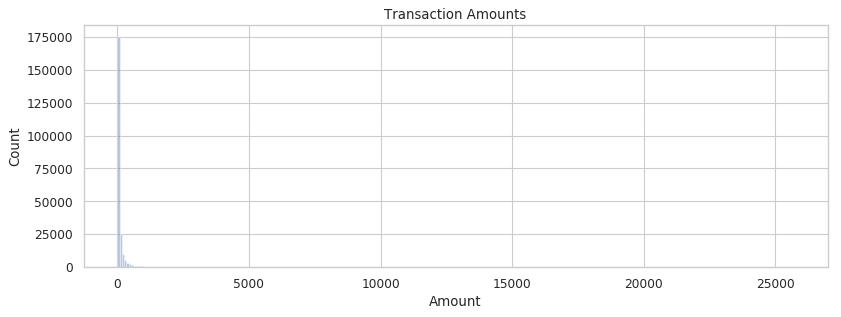

In [95]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5,1,'Transaction Amounts')

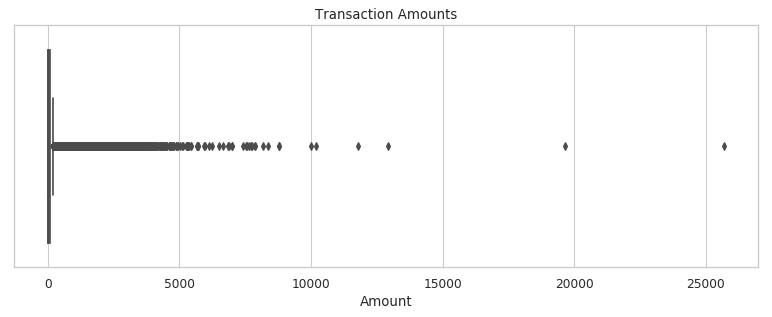

In [96]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [97]:
X_train['Amount'].skew()

16.910303546516744

In [98]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9

In [99]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)


In [100]:
maxlog

0.13436569191158662

In [101]:
(min_ci, max_ci)

(0.13291390124729957, 0.1358266545085391)

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Transaction Amounts (Box-Cox Transformed)')

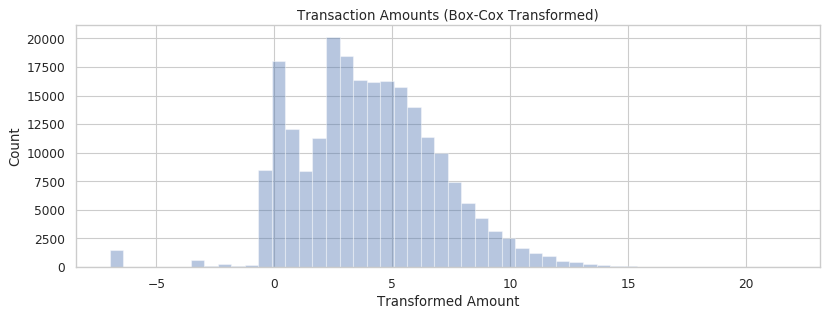

In [102]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [103]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680566
Name: Amount, dtype: float64

In [104]:
X_train['Amount'].skew()

0.11421481857917302

In [105]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 

In [106]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

/home/mrityunjay/.conda/envs/project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


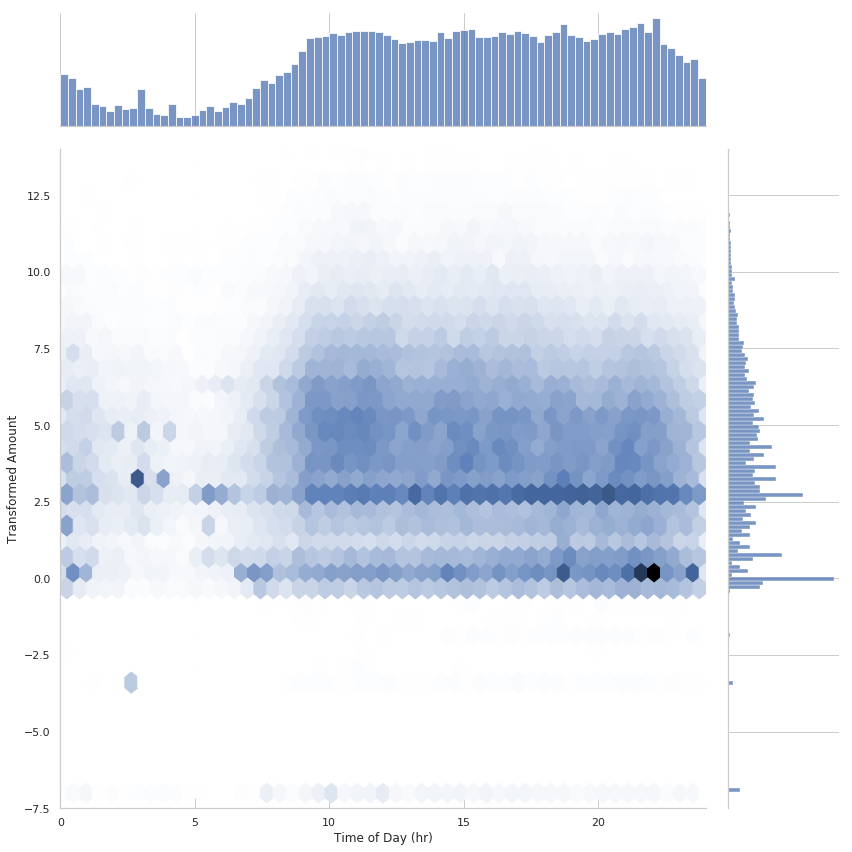

In [109]:
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex',height=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

In [ ]:
pca_vars = ['V%i' % k for k in range(1,29)]


In [ ]:
X_train[pca_vars].describe()


Text(0.5,1,'V1-V28 Means')

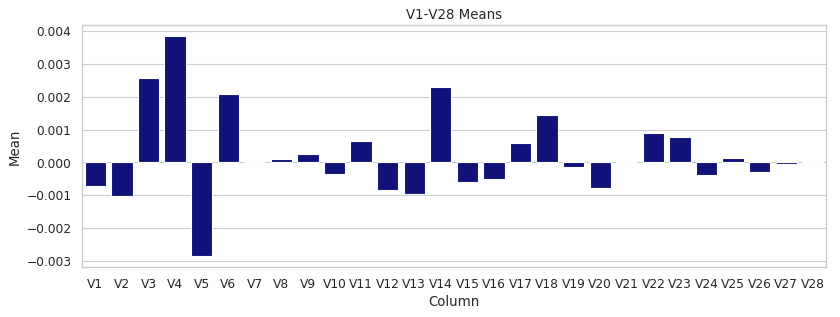

In [43]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5,1,'V1-V28 Standard Deviations')

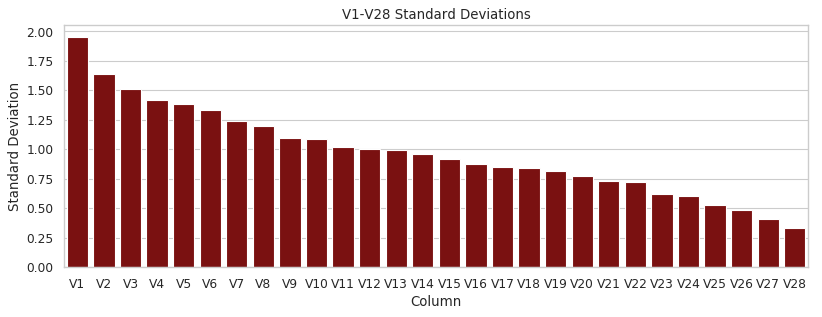

In [44]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')


Text(0.5,1,'V1-V28 Skewnesses')

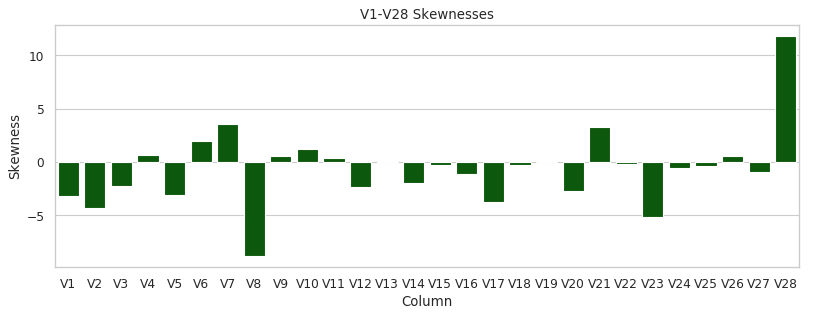

In [45]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

Text(0.5,1,'V8')

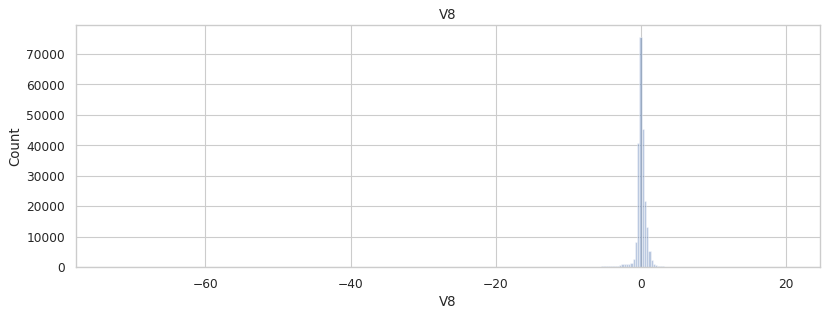

In [46]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')

Text(0.5,1,'V8')

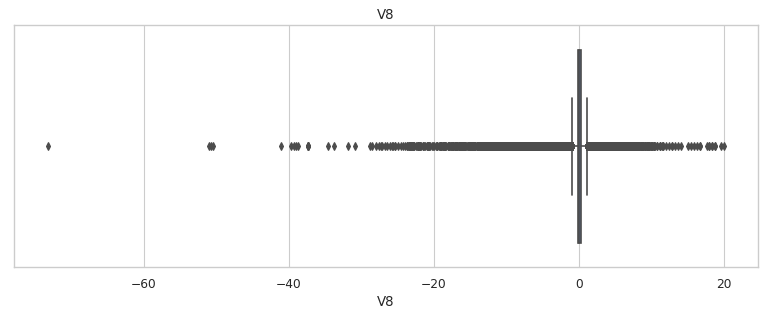

In [47]:

plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

Text(0.5,1,'V1-V28 Kurtoses')

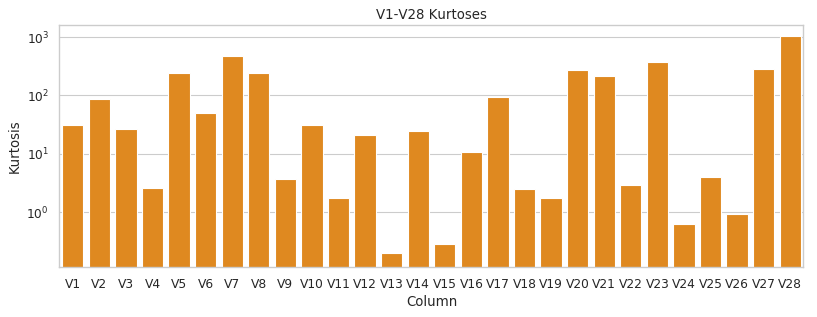

In [48]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5,1,'V1-V28 Medians')

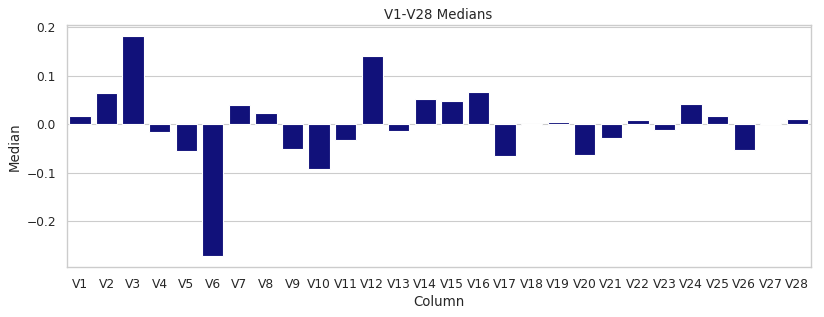

In [49]:

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5,1,'V1-V28 IQRs')

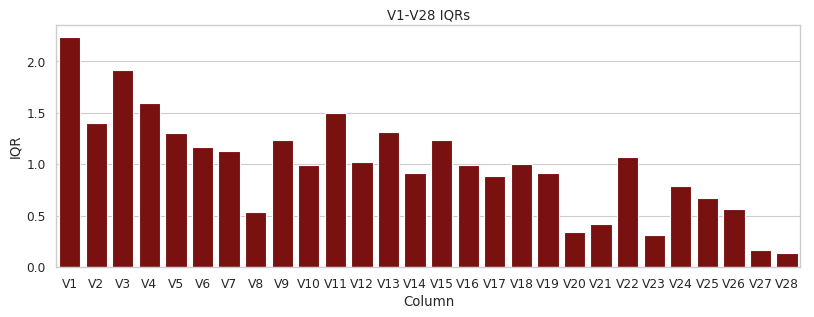

In [50]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [51]:
def confusion(classifier, X_test, y_test):
    y_pred  = classifier.predict(X_test)
    return confusion_matrix(y_test, y_pred).ravel()

In [52]:
def show(tn,fp,fn,tp):
    print("TN:" + str(tn) + " FP:" + str(fp) + " FN:" + str(fn) + " TP:" + str(tp) + 
          " FNR=" + str(fn/(fn+tp)) + " FPR=" + str(fp/(fp+tn)))

In [54]:
show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10).fit(X_train,y_train),X_test,y_test))

TN:56859 FP:5 FN:14 TP:84 FNR=0.14285714285714285 FPR=8.792909397861564e-05


In [55]:
show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced").fit(X_train,y_train),X_test,y_test))

TN:56858 FP:6 FN:21 TP:77 FNR=0.21428571428571427 FPR=0.00010551491277433877


In [66]:
show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight="balanced_subsample").fit(X_train,y_train),X_test,y_test))

TN:56856 FP:8 FN:17 TP:81 FNR=0.17346938775510204 FPR=0.00014068655036578504


In [56]:
w_neg = 10**-5
w_pos_range = np.exp(np.arange(np.log(1), np.log(10**9)))

In [68]:
for w_pos in w_pos_range:
    print("w_pos: " + str(w_pos))
    show(*confusion(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight={0: w_neg, 1: w_pos}).fit(X_train,y_train),X_test,y_test))

w_pos: 1.0
TN:56857 FP:7 FN:18 TP:80 FNR=0.1836734693877551 FPR=0.0001231007315700619
w_pos: 2.718281828459045
TN:56858 FP:6 FN:20 TP:78 FNR=0.20408163265306123 FPR=0.00010551491277433877
w_pos: 7.38905609893065
TN:56859 FP:5 FN:21 TP:77 FNR=0.21428571428571427 FPR=8.792909397861564e-05
w_pos: 20.085536923187668
TN:56857 FP:7 FN:20 TP:78 FNR=0.20408163265306123 FPR=0.0001231007315700619
w_pos: 54.598150033144236
TN:56858 FP:6 FN:19 TP:79 FNR=0.19387755102040816 FPR=0.00010551491277433877
w_pos: 148.4131591025766
TN:56858 FP:6 FN:18 TP:80 FNR=0.1836734693877551 FPR=0.00010551491277433877
w_pos: 403.4287934927351
TN:56853 FP:11 FN:16 TP:82 FNR=0.16326530612244897 FPR=0.00019344400675295442
w_pos: 1096.6331584284585
TN:56854 FP:10 FN:19 TP:79 FNR=0.19387755102040816 FPR=0.00017585818795723128
w_pos: 2980.9579870417283
TN:56841 FP:23 FN:14 TP:84 FNR=0.14285714285714285 FPR=0.00040447383230163194
w_pos: 8103.083927575384
TN:56771 FP:93 FN:14 TP:84 FNR=0.14285714285714285 FPR=0.0016354811480

In [66]:
classifier = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=10, class_weight={0: 10**-5, 1: 403.42 }).fit(X_train,y_train)

In [80]:
y_pred = classifier.predict(X_test)
average_precision = average_precision_score(y_test,y_pred)
print(average_precision_score(y_test,y_pred))

0.7394181666607467


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections




from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:

from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_reg_sm = LogisticRegression()



log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)




for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9429357853619781
precision: 0.06055442977345941
recall: 0.9111976630963973
f1: 0.11175825890195594
---------------------------------------------------------------------------------------------------------------------------------------


In [76]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(accuracy_score(original_ytest, smote_prediction))

0.9880620073383544


In [69]:
y_score = best_est.decision_function(original_Xtest)

In [70]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5,1,'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

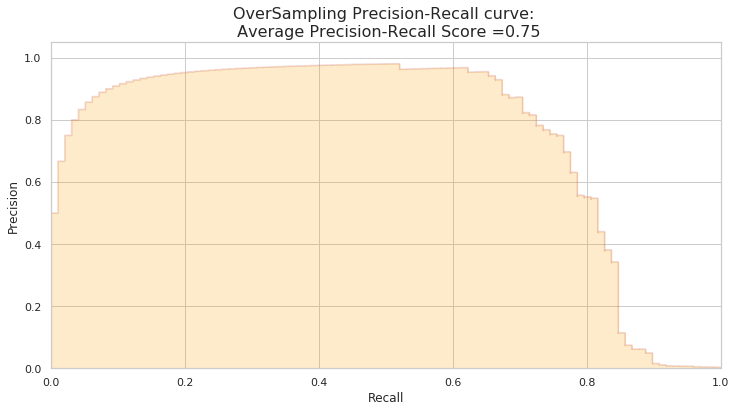

In [71]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)